<a href="https://colab.research.google.com/github/cduplan59/CFT_analysis/blob/main/test_gauss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     A  sigma  max|d ln y/dτ|  max|τ H'D/H|  viol_y  viol_H
0  1.0    0.2        3.032539      0.169030    True   False
1  1.0    1.0        0.606530      0.169032    True   False
2  1.0    2.5        0.242612      0.169033   False   False
3  2.0    2.5        0.485224      0.314370    True    True


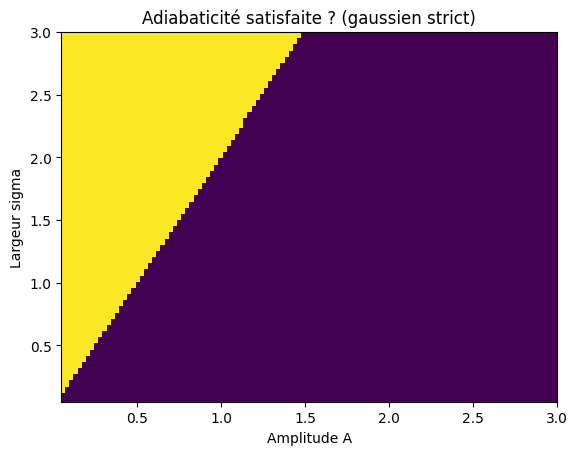

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# τ doit être la même variable que dans Eq.(15)
tau = np.linspace(-10.0, 10.0, 8000)
tau0 = 0.0

HD_base = 4.0
eps_y = 0.3
eps_H = 0.3

def X_gauss(tau, A, sigma):
    return A * np.exp(-0.5*((tau-tau0)/sigma)**2)

def metrics(A, sigma):
    X = X_gauss(tau, A, sigma)

    # choix minimal cohérent avec votre texte :
    ln_y = X
    HD = HD_base + X

    dX = -(tau-tau0)/(sigma**2) * X
    dlny = dX
    dHD = dX

    m1 = float(np.max(np.abs(dlny)))
    m2 = float(np.max(np.abs(tau * dHD / HD)))
    return m1, m2

# Démonstration sur quelques points
demo = []
for A, sigma in [(1.0, 0.2), (1.0, 1.0), (1.0, 2.5), (2.0, 2.5)]:
    m1, m2 = metrics(A, sigma)
    demo.append([A, sigma, m1, m2, m1>eps_y, m2>eps_H])
df = pd.DataFrame(demo, columns=["A","sigma","max|d ln y/dτ|","max|τ H'D/H|","viol_y","viol_H"])
print(df)

# Carte (A,sigma) OK/KO
A_vals = np.linspace(0.05, 3.0, 120)
s_vals = np.linspace(0.05, 3.0, 120)
ok = np.zeros((len(s_vals), len(A_vals)), dtype=bool)

for i,s in enumerate(s_vals):
    for j,A in enumerate(A_vals):
        m1,m2 = metrics(A,s)
        ok[i,j] = (m1<=eps_y) and (m2<=eps_H)

plt.figure()
plt.imshow(ok, origin="lower", aspect="auto",
           extent=[A_vals[0], A_vals[-1], s_vals[0], s_vals[-1]])
plt.xlabel("Amplitude A")
plt.ylabel("Largeur sigma")
plt.title("Adiabaticité satisfaite ? (gaussien strict)")
plt.show()
